In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Loading Data

In [2]:
train = pd.read_csv("forest-cover-type-prediction/train.csv")

In [3]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [4]:
test = pd.read_csv("forest-cover-type-prediction/test.csv")
test.head()
print(train.shape)
print(test.shape)

(15120, 56)
(565892, 55)


## Exploratory Data Analysis

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [6]:
train.groupby('Cover_Type').size()

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
dtype: int64

In [7]:
train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [8]:
yaxis_labels = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

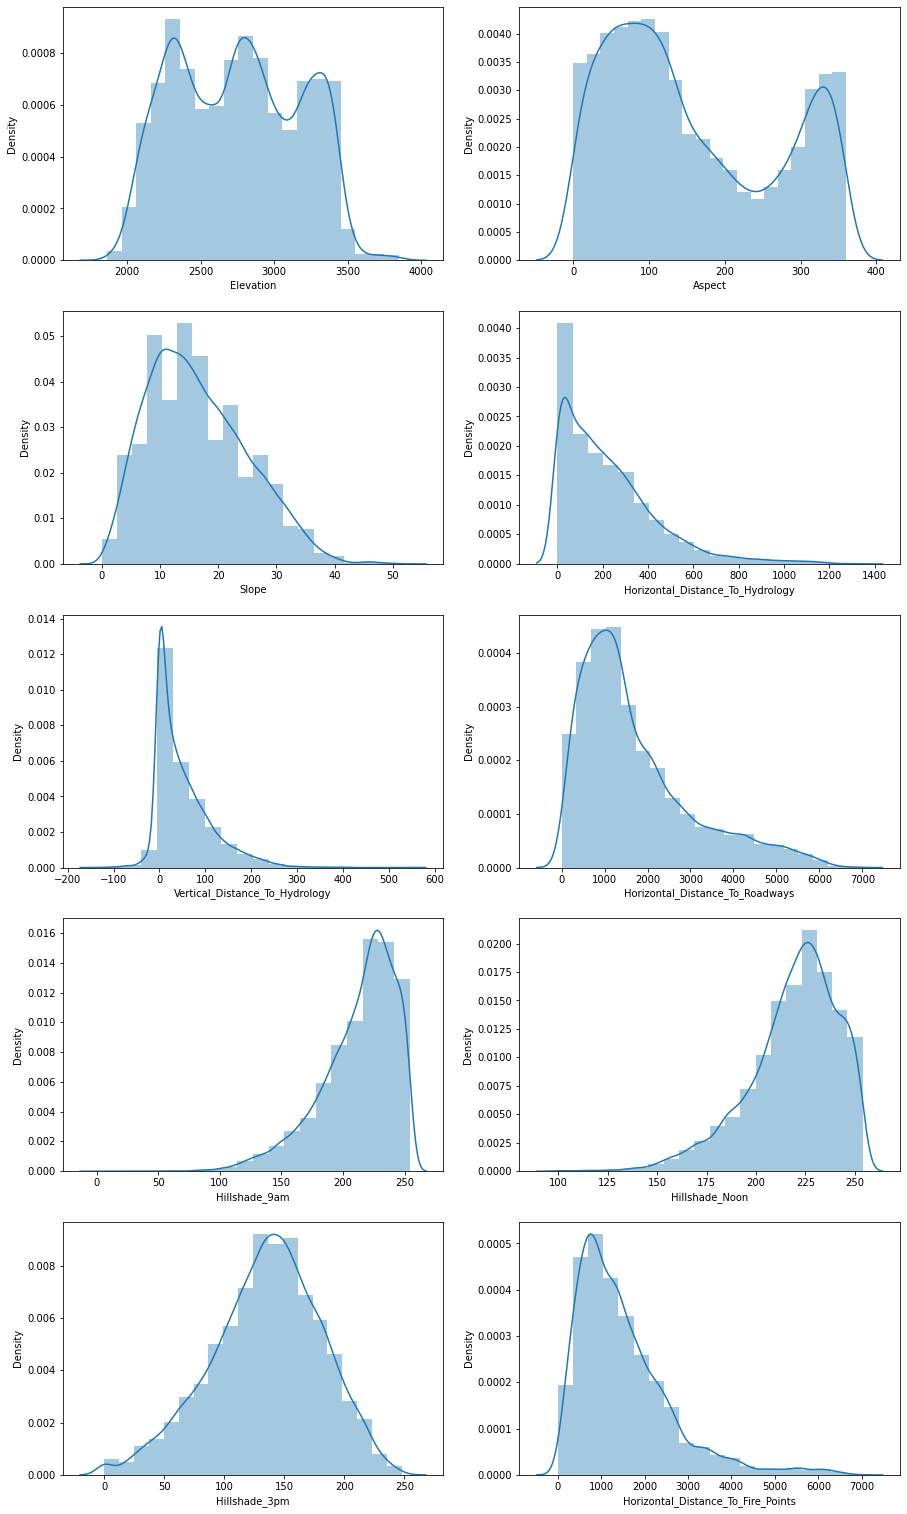

In [9]:
fig, ax = plt.subplots(5, 2, figsize=(15, 27))

for i, feature in enumerate(yaxis_labels):
    sns.distplot(train[feature], bins=20, ax=ax[i//2, i%2])
plt.show()


In [10]:
counts = []
for i in range(1,8):
    counts.append(sum(train[train['Cover_Type'] == i]['Soil_Type1']))

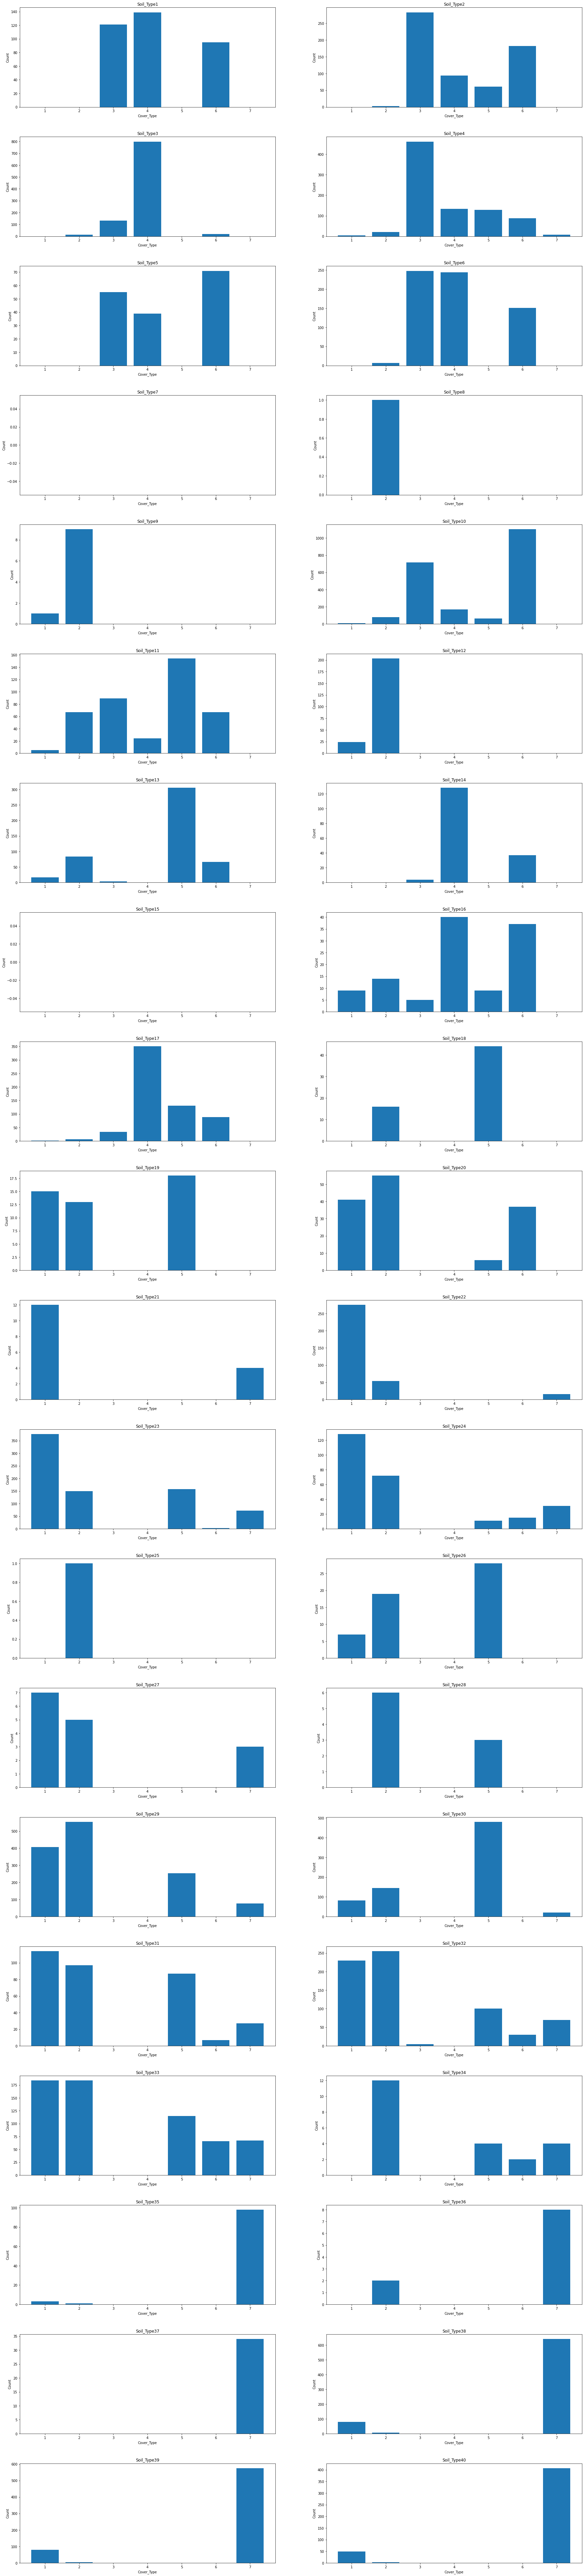

In [11]:
fig, axs = plt.subplots(20, 2, figsize=(30, 140))

for i in range(1, 41):
    counts = []
    for j in range(1, 8):
        counts.append(sum(train[train['Cover_Type'] == j]['Soil_Type' + str(i)]))
    axs[(i-1)//2, (i-1)%2].bar(x=range(1, 8), height=counts)
    axs[(i-1)//2, (i-1)%2].set_xlabel('Cover_Type')
    axs[(i-1)//2, (i-1)%2].set_title('Soil_Type' + str(i))
    axs[(i-1)//2, (i-1)%2].set_ylabel('Count')
plt.subplots_adjust(hspace = 0.3)
plt.show()

## Modeling

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


Xtr, Xva, Ytr, Yva = train_test_split(train.drop('Cover_Type', axis=1), 
                                        train['Cover_Type'],
                                        test_size = 0.1, 
                                        random_state=0)

Xtr[yaxis_labels] = StandardScaler().fit_transform(Xtr[yaxis_labels])
Xva[yaxis_labels] = StandardScaler().fit_transform(Xva[yaxis_labels])

Xtr.drop(columns='Id', inplace=True)
Xva.drop(columns='Id', inplace=True)

print(Xtr.shape)
print(Ytr.shape)
print(Xva.shape)
print(Yva.shape)

(13608, 54)
(13608,)
(1512, 54)
(1512,)


### Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rf = RandomForestClassifier(n_estimators=500, max_depth=100, min_samples_leaf=4, min_samples_split = 4, max_features='auto')
rf.fit(Xtr, Ytr)

RandomForestClassifier(max_depth=100, min_samples_leaf=4, min_samples_split=4,
                       n_estimators=500)

Training AUC: 0.9968667918599922
Training Accuracy: 0.9384185773074663
Validation AUC: 0.9775856442549149
Validation Accuracy: 0.8287037037037037


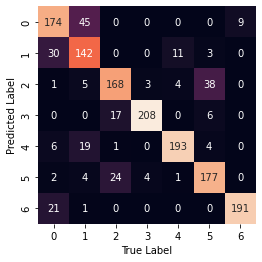

In [15]:
print("Training AUC:", metrics.roc_auc_score(Ytr, rf.predict_proba(Xtr), multi_class='ovr'))
print("Training Accuracy:", metrics.accuracy_score(Ytr, rf.predict(Xtr)))
print("Validation AUC:", metrics.roc_auc_score(Yva, rf.predict_proba(Xva), multi_class='ovr'))
print("Validation Accuracy:", metrics.accuracy_score(Yva, rf.predict(Xva)))

Ypred = rf.predict(Xva)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Yva, Ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True Label')
plt.ylabel('Predicted Label');

### Neural Network Using Keras

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras

In [17]:
from sklearn import preprocessing

In [18]:
#Data
x = train[train.columns[1:55]]
xtest = test[test.columns[1:55]]
y = train.Cover_Type
#Splitting into train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state =  40)

In [19]:
#Standarize the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
nn = tf.keras.Sequential()
#Multi-Class Classification
nn.add(keras.layers.Dense(1000, activation = 'relu', input_shape = (54,)))
nn.add(keras.layers.Dropout(0.2))
nn.add(keras.layers.Dense(500, activation = 'relu'))
nn.add(keras.layers.Dropout(0.2))
nn.add(keras.layers.Dense(100, activation = 'relu'))
nn.add(keras.layers.Dropout(0.2))
nn.add(keras.layers.Dense(8, activation = 'softmax'))


In [21]:
#Compile and Fit
nn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

nn.fit(x_train, keras.utils.to_categorical(y_train), 
            batch_size = 100, epochs = 30, 
            validation_data = (x_test, keras.utils.to_categorical(y_test)))

Epoch 1/30
121/121 [==============================] - 3s 16ms/step - loss: 0.9483 - accuracy: 0.6145 - val_loss: 0.7550 - val_accuracy: 0.6812
Epoch 2/30
121/121 [==============================] - 2s 14ms/step - loss: 0.7343 - accuracy: 0.6928 - val_loss: 0.6409 - val_accuracy: 0.7285
Epoch 3/30
121/121 [==============================] - 2s 15ms/step - loss: 0.6651 - accuracy: 0.7237 - val_loss: 0.5968 - val_accuracy: 0.7411
Epoch 4/30
121/121 [==============================] - 2s 17ms/step - loss: 0.6187 - accuracy: 0.7407 - val_loss: 0.5839 - val_accuracy: 0.7470
Epoch 5/30
121/121 [==============================] - 3s 21ms/step - loss: 0.5919 - accuracy: 0.7475 - val_loss: 0.5638 - val_accuracy: 0.7576
Epoch 6/30
121/121 [==============================] - 2s 19ms/step - loss: 0.5680 - accuracy: 0.7657 - val_loss: 0.5548 - val_accuracy: 0.7616
Epoch 7/30
121/121 [==============================] - 2s 19ms/step - loss: 0.5475 - accuracy: 0.7721 - val_loss: 0.5407 - val_accuracy: 0.7642

32,16: loss: 0.5254 - accuracy: 0.7870

In [22]:
y_pred = nn.predict(x_test)
score = nn.evaluate(x_test, keras.utils.to_categorical(y_test),verbose=1)
print(score)

95/95 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 0.8452
[0.4236614406108856, 0.8452380895614624]


### SVC

In [23]:
from sklearn.svm import SVC

C = [70, 85, 100, 115, 130]
for c in C:
    svc = SVC(C=c)
    svc.fit(Xtr, Ytr)
    print(c, svc.score(Xva, Yva))

70 0.8432539682539683
85 0.8425925925925926
100 0.843915343915344
115 0.8472222222222222
130 0.8445767195767195


In [24]:
svc = SVC(C=115).fit(Xtr, Ytr)
svc.score(Xva, Yva)

0.8472222222222222

### K Nearest Neighbors

4 0.7784391534391535
5 0.7804232804232805
6 0.7777777777777778
7 0.7738095238095238


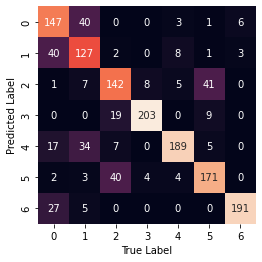

In [25]:
from sklearn.neighbors import KNeighborsClassifier

for k in [4,5,6,7]:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(Xtr, Ytr)

    ypred = knn.predict(Xva)

    print(k, knn.score(Xva, Yva))

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Yva, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True Label')
plt.ylabel('Predicted Label');

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=33e77cfb-76b3-4929-b427-63f56a4dc527' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>